<a href="https://colab.research.google.com/github/myra349/vistarnetra/blob/main/STUDENTCOURSE_RECOMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd

random.seed(42)

# ------------------------------
# STATIC DATA
# ------------------------------
first_names = ["Aarav","Vihaan","Aditya","Sachin","Karthik","Rohan","Siddharth","Arjun","Rahul","Neeraj",
               "Priya","Ananya","Sakshi","Deepika","Shruti","Pooja","Sneha","Kavya","Anjali","Ritika"]
last_names = ["Reddy","Kumar","Sharma","Verma","Naidu","Singh","Patel","Gupta","Iyer","Kapoor",
              "Das","Nair","Joshi","Bose","Khan","Mehta","Chaudhary","Rao","Prasad","Bhat"]

departments = ["CSE","ECE","IT","MECH","EEE"]
semesters = [3,4,5,6,7,8]
subjects_pool = ["DBMS","OS","CN","DSA","Java","ML","AI","WebTech",
                 "Networks","Compiler","SE","Cloud","SAD","DS"]
areas = ["Machine Learning","Web Development","Systems","Networks",
         "Databases","Embedded","Cloud","Security"]
learning_styles = ["Visual","Auditory","Kinesthetic","Reading/Writing","Mixed"]

# ------------------------------
# RISK HELPERS
# ------------------------------

def attendance_risk(att):
    if att < 55: return 1
    elif att < 70: return 0.5
    return 0

def marks_risk(mid1, mid2, final):
    if final < 45 or (mid1 + mid2) < 35:
        return 1
    elif final < 60:
        return 0.5
    return 0

def gpa_risk(gpa):
    if gpa < 6: return 1
    elif gpa < 7: return 0.5
    return 0

def backlog_risk():
    b = random.choice([0,0,0,1,1,2,3])
    if b >= 3: return 1, b
    elif b == 2: return 0.7, b
    elif b == 1: return 0.4, b
    return 0, b

def learning_style_risk(style):
    if style in ["Kinesthetic", "Auditory"]:
        return 0.5
    return 0.2

def interest_mismatch_risk(interest, pref):
    return 1 if pref not in interest else 0

def extracurricular_risk(score):
    if score <= 3: return 0.6
    return 0.1

def semester_risk(sem):
    if sem >= 7: return 0.7
    elif sem >= 5: return 0.4
    return 0.2

# ------------------------------
# GENERATE 800 STUDENTS
# ------------------------------

rows = []

for i in range(1, 801):
    sid = f"S{str(i).zfill(3)}"
    name = f"{random.choice(first_names)} {random.choice(last_names)}"
    dept = random.choice(departments)
    sem = random.choice(semesters)

    # interests
    interests = random.sample(areas, k=random.choice([1,2]))
    interests_str = ";".join(interests)

    # scores
    mid1 = max(0, min(30, int(random.gauss(18, 6))))
    mid2 = max(0, min(30, int(random.gauss(17, 7))))
    final = max(0, min(100, int(random.gauss(60, 15))))

    # attendance
    attendance = round(min(100, max(35, int(
        (mid1+mid2)/60*60 +
        random.randint(-15, 15) +
        final/100*10
    ))),2)

    # gpa
    gpa = round(min(10.0, max(5.0,
        5 + (mid1+mid2)/60*2 + final/100*3 + random.uniform(-0.8, 0.8)
    )),2)

    # past courses
    past_courses = ";".join(random.sample(subjects_pool, k=random.choice([3,4,5,6])))

    pref_area = random.choice(areas)
    extracurricular = random.randint(0, 10)
    learning_style = random.choice(learning_styles)
    career_goal = random.choice(["Software Developer","Data Scientist","Research",
                                 "Network Engineer","Entrepreneur","Cyber Security","NA"])

    # backlogs + backlog risk
    back_risk, backlogs = backlog_risk()

    # risk model calculation
    score = (
        attendance_risk(attendance) * 0.30 +
        marks_risk(mid1, mid2, final) * 0.25 +
        gpa_risk(gpa) * 0.15 +
        back_risk * 0.10 +
        learning_style_risk(learning_style) * 0.05 +
        interest_mismatch_risk(interests, pref_area) * 0.10 +
        extracurricular_risk(extracurricular) * 0.03 +
        semester_risk(sem) * 0.02
    )

    risk_flag = 1 if score >= 0.5 else 0

    rows.append({
        "student_id": sid,
        "name": name,
        "department": dept,
        "semester": sem,
        "interests": interests_str,
        "mid1": mid1,
        "mid2": mid2,
        "final": final,
        "attendance_percent": attendance,
        "cumulative_gpa": gpa,
        "past_courses": past_courses,
        "preferred_area": pref_area,
        "extracurricular_score": extracurricular,
        "learning_style": learning_style,
        "career_goal": career_goal,
        "backlogs": backlogs,
        "risk_score": round(score, 3),
        "risk_flag": risk_flag
    })

df = pd.DataFrame(rows)
df.to_csv("student_800_dataset.csv", index=False)

print("✅ Generated student_800_dataset.csv successfully!")
print(df.head(10))




✅ Generated student_800_dataset.csv successfully!
  student_id              name department  semester  \
0       S001      Sachin Reddy         IT         4   
1       S002        Kavya Bose        ECE         6   
2       S003       Ritika Iyer        CSE         8   
3       S004       Sakshi Iyer       MECH         8   
4       S005       Kavya Gupta         IT         3   
5       S006         Kavya Rao         IT         8   
6       S007      Sakshi Joshi        EEE         6   
7       S008  Neeraj Chaudhary        EEE         4   
8       S009      Neeraj Gupta        CSE         4   
9       S010       Sakshi Nair       MECH         7   

                   interests  mid1  mid2  final  attendance_percent  \
0                    Systems    17     6     64                  35   
1     Machine Learning;Cloud    16    20     38                  35   
2   Web Development;Networks    22    19     38                  40   
3           Systems;Security     8    10     77             

In [ ]:
from google.colab import files
files.download("student_800_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Colab cell 1
!pip install -q plotly scikit-learn category_encoders

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, roc_auc_score
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
# Colab cell 2
from google.colab import files
print("/student_800_dataset.csv")
uploaded = files.upload()

# After upload, load into df
fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)
print("Loaded:", fn, "shape:", df.shape)
df.head(5)


/student_800_dataset.csv


Saving student_800_dataset.csv to student_800_dataset.csv
Loaded: student_800_dataset.csv shape: (800, 18)


,student_id,name,department,semester,interests,mid1,mid2,final,attendance_percent,cumulative_gpa,past_courses,preferred_area,extracurricular_score,learning_style,career_goal,backlogs,risk_score,risk_flag
0,S001,Sachin Reddy,IT,4,Systems,17,6,64,35,6.94,DSA;DS;Networks,Machine Learning,8,Auditory,Cyber Security,2,0.827,1
1,S002,Kavya Bose,ECE,6,Machine Learning;Cloud,16,20,38,35,6.98,SAD;ML;OS;Cloud,Cloud,1,Kinesthetic,NaN,0,0.676,1
2,S003,Ritika Iyer,CSE,8,Web Development;Networks,22,19,38,40,7.63,DBMS;SE;DSA,Databases,1,Auditory,NaN,0,0.707,1
3,S004,Sakshi Iyer,MECH,8,Systems;Security,8,10,77,35,8.61,Compiler;SE;CN,Networks,2,Reading/Writing,Network Engineer,0,0.692,1
4,S005,Kavya Gupta,IT,3,Machine Learning,20,10,90,42,9.30,DSA;SE;WebTech;AI;Cloud,Systems,4,Auditory,Data Scientist,2,0.752,1


In [ ]:
# Colab cell 3
# Ensure required columns exist; fill missing
expected_cols = ["student_id","name","department","semester","interests","mid1","mid2",
                 "final","attendance_percent","cumulative_gpa","past_courses",
                 "preferred_area","extracurricular_score","learning_style",
                 "career_goal","backlogs","risk_score","risk_flag"]
for c in expected_cols:
    if c not in df.columns:
        df[c] = np.nan

# Convert types
df["semester"] = df["semester"].astype(int)
df["attendance_percent"] = df["attendance_percent"].astype(float)
df["backlogs"] = df["backlogs"].fillna(0).astype(int)
df["extracurricular_score"] = df["extracurricular_score"].fillna(0).astype(int)
df["risk_flag"] = df["risk_flag"].fillna(0).astype(int)

# Derived features
df["mid_sum"] = df["mid1"].fillna(0) + df["mid2"].fillna(0)
df["final_scaled"] = df["final"].fillna(0) / 100.0
df["interest_list"] = df["interests"].fillna("").apply(lambda s: [x.strip() for x in s.split(";") if x.strip()])

# quick overview
df.describe(include="all").T[["count","unique"]].head(10)


,count,unique
student_id,800,800
name,800,352
department,800,5
semester,800.0,NaN
interests,800,64
mid1,800.0,NaN
mid2,800.0,NaN
final,800.0,NaN
attendance_percent,800.0,NaN
cumulative_gpa,800.0,NaN


In [ ]:
# Colab cell 4
import math

def attendance_risk(att):
    if att < 55: return 1.0
    elif att < 70: return 0.5
    return 0.0

def marks_risk(mid1, mid2, final):
    if final < 45 or (mid1 + mid2) < 35:
        return 1.0
    elif final < 60:
        return 0.5
    return 0.0

def gpa_risk(gpa):
    if gpa < 6.0: return 1.0
    elif gpa < 7.0: return 0.5
    return 0.0

def backlog_risk_num(b):
    if b >= 3: return 1.0
    elif b == 2: return 0.7
    elif b == 1: return 0.4
    return 0.0

def learning_style_risk(style):
    if pd.isna(style): return 0.2
    if style in ["Kinesthetic","Auditory"]:
        return 0.5
    return 0.2

def interest_mismatch_risk(interests, pref_area):
    if not isinstance(interests, list): return 1.0
    return 0.0 if pref_area in interests else 1.0

def extracurricular_risk(score):
    if score <= 3: return 0.6
    return 0.1

def semester_risk(sem):
    if sem >= 7: return 0.7
    elif sem >= 5: return 0.4
    return 0.2

def compute_risk_score(row):
    ar = attendance_risk(row["attendance_percent"])
    mr = marks_risk(row["mid1"], row["mid2"], row["final"])
    gr = gpa_risk(row["cumulative_gpa"])
    br = backlog_risk_num(row["backlogs"])
    lr = learning_style_risk(row["learning_style"])
    ir = interest_mismatch_risk(row["interest_list"], row["preferred_area"])
    er = extracurricular_risk(row["extracurricular_score"])
    sr = semester_risk(row["semester"])
    score = (ar*0.30 + mr*0.25 + gr*0.15 + br*0.10 + lr*0.05 + ir*0.10 + er*0.03 + sr*0.02)
    return round(score,3)

# compute & compare to existing risk_score column (if present)
df["computed_risk_score"] = df.apply(compute_risk_score, axis=1)
df["computed_risk_flag"] = (df["computed_risk_score"] >= 0.5).astype(int)

# Quick comparison
print("Counts: provided risk_flag value counts ->")
print(df["risk_flag"].value_counts())
print("Computed risk_flag counts ->")
print(df["computed_risk_flag"].value_counts())

# Show sample mismatches
mismatch = df[df["risk_flag"] != df["computed_risk_flag"]]
print("Mismatches sample (first 10):", len(mismatch))
mismatch.head(10)


Counts: provided risk_flag value counts ->
risk_flag
1    579
0    221
Name: count, dtype: int64
Computed risk_flag counts ->
computed_risk_flag
1    579
0    221
Name: count, dtype: int64
Mismatches sample (first 10): 0


,student_id,name,department,semester,interests,mid1,mid2,final,attendance_percent,cumulative_gpa,...,learning_style,career_goal,backlogs,risk_score,risk_flag,mid_sum,final_scaled,interest_list,computed_risk_score,computed_risk_flag


In [ ]:
# Colab cell 5
# Prepare features for ML
features = ["attendance_percent","mid_sum","final","cumulative_gpa","backlogs","extracurricular_score","semester"]
X = df[features].fillna(0)
y = df["computed_risk_flag"]  # use computed labels for consistency

# scale
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob),3))

# Save model objects for later use in notebook
import joblib
joblib.dump(rf, "rf_student_risk.pkl")
joblib.dump(scaler, "scaler_student.pkl")


              precision    recall  f1-score   support

           0      0.955     0.955     0.955        44
           1      0.983     0.983     0.983       116

    accuracy                          0.975       160
   macro avg      0.969     0.969     0.969       160
weighted avg      0.975     0.975     0.975       160

ROC AUC: 0.991


['scaler_student.pkl']

In [ ]:
# Colab cell 6
# Use scaled X to cluster
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(Xs)
df["cluster"] = clusters

# Cluster summary
cluster_summary = df.groupby("cluster")[["attendance_percent","mid_sum","final","cumulative_gpa"]].mean().round(2)
cluster_counts = df["cluster"].value_counts().sort_index()
print(cluster_counts)
cluster_summary


cluster
0    191
1    229
2    178
3    202
Name: count, dtype: int64


,attendance_percent,mid_sum,final,cumulative_gpa
cluster,,,,
0,55.59,43.74,63.03,8.45
1,39.50,32.75,72.92,8.44
2,37.61,28.28,51.22,7.33
3,40.43,33.31,48.43,7.46


In [ ]:
# Colab cell 7
# Build a simple text-feature matrix from interests + past_courses + preferred_area
def text_profile(row):
    parts = []
    parts += row["interest_list"] if isinstance(row["interest_list"], list) else []
    parts += [x.strip() for x in str(row["past_courses"]).split(";") if x.strip()]
    parts += [str(row["preferred_area"])]
    return " ".join([p.replace(" ", "_") for p in parts])

df["text_profile"] = df.apply(text_profile, axis=1)

# Create simple TF matrix using sklearn CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
tf = vec.fit_transform(df["text_profile"].astype(str))

# A function to recommend top-N courses for a student using cosine similarity to other students' profiles
def recommend_for_student(student_id, top_n=6):
    idx = df.index[df["student_id"] == student_id].tolist()
    if not idx:
        return []
    idx = idx[0]
    sim = cosine_similarity(tf[idx], tf).flatten()
    # exclude self
    sim[idx] = 0
    # get top similar students
    top_idx = np.argsort(sim)[::-1][:top_n]
    # Collect popular courses from those students' past_courses
    courses = {}
    for i in top_idx:
        pcs = [c.strip() for c in str(df.loc[i, "past_courses"]).split(";") if c.strip()]
        for c in pcs:
            courses[c] = courses.get(c, 0) + 1
    # Sort by frequency
    recs = sorted(courses.items(), key=lambda x: x[1], reverse=True)
    return [c for c,_ in recs][:top_n]

# Example
print("Recommendations for S001 ->", recommend_for_student("S001", top_n=6))


Recommendations for S001 -> ['DSA', 'DS', 'Networks', 'DBMS', 'WebTech', 'CN']


In [ ]:
# Colab cell 8
def student_analysis(student_id):
    row = df[df["student_id"] == student_id]
    if row.empty:
        print("Student not found:", student_id); return
    row = row.iloc[0]
    # core metrics
    print(f"--- {row['student_id']} | {row['name']} ---")
    print("Department:", row['department'], "Sem:", row['semester'])
    print("Attendance %:", row['attendance_percent'])
    print("Mid1,Mid2,Final:", int(row['mid1']), int(row['mid2']), int(row['final']))
    print("GPA:", row['cumulative_gpa'], "Backlogs:", row['backlogs'])
    print("Computed risk score:", row['computed_risk_score'], "Risk flag:", row['computed_risk_flag'])
    print("Cluster:", row['cluster'])
    print("Top Recommendations (content-based):", recommend_for_student(student_id, top_n=6))
    # show similar top-5 students
    idx = df.index[df["student_id"] == student_id].tolist()[0]
    sim = cosine_similarity(tf[idx], tf).flatten()
    top_sim = np.argsort(sim)[::-1][:5]
    print("\nSimilar students (top 5):")
    for i in top_sim:
        print(df.loc[i,["student_id","name","department","semester"]].to_dict(), "sim:", round(sim[i],3))

# Try one
student_analysis(df.loc[0,"student_id"])


--- S001 | Sachin Reddy ---
Department: IT Sem: 4
Attendance %: 35.0
Mid1,Mid2,Final: 17 6 64
GPA: 6.94 Backlogs: 2
Computed risk score: 0.827 Risk flag: 1
Cluster: 2
Top Recommendations (content-based): ['DSA', 'DS', 'Networks', 'DBMS', 'WebTech', 'CN']

Similar students (top 5):
{'student_id': 'S001', 'name': 'Sachin Reddy', 'department': 'IT', 'semester': 4} sim: 1.0
{'student_id': 'S155', 'name': 'Sakshi Naidu', 'department': 'ECE', 'semester': 3} sim: 0.791
{'student_id': 'S541', 'name': 'Shruti Bhat', 'department': 'EEE', 'semester': 4} sim: 0.745
{'student_id': 'S056', 'name': 'Arjun Sharma', 'department': 'MECH', 'semester': 8} sim: 0.73
{'student_id': 'S688', 'name': 'Priya Gupta', 'department': 'MECH', 'semester': 3} sim: 0.73


In [ ]:
# Ensure clean lists
df["interest_list"] = df["interests"].fillna("").apply(
    lambda x: [t.strip() for t in str(x).split(";") if t.strip()]
)

df["past_list"] = df["past_courses"].fillna("").apply(
    lambda x: [t.strip() for t in str(x).split(";") if t.strip()]
)


In [ ]:
def compute_subject_popularity(df):
    counter = Counter()

    for i, row in df.iterrows():
        topics = []
        topics += row["interest_list"]
        topics += row["past_list"]
        topics += [row["preferred_area"]]

        for s in topics:
            if s.strip():
                counter[s] += 1

    pop_df = pd.DataFrame({
        "subject": list(counter.keys()),
        "count": list(counter.values())
    }).sort_values("count", ascending=False)

    return pop_df


In [ ]:
import numpy as np
from collections import Counter

In [ ]:
pop_df = compute_subject_popularity(df)
pop_df.head(10)


,subject,count
5,Cloud,500
3,Networks,492
15,CN,301
17,AI,282
2,DS,275
14,Compiler,269
8,OS,268
9,Web Development,266
7,ML,265
12,Databases,259


In [ ]:
fig = px.bar(
    pop_df,
    x="subject",
    y="count",
    text="count",
    title="📌 Subject Popularity (Based on Interests + Past Courses + Preferred Area)",
    color="count",
    color_continuous_scale="Blues"
)

fig.update_layout(
    xaxis_title="Subject",
    yaxis_title="Preference Count",
    template="plotly_white",
    height=500
)

fig.show()


In [ ]:
# Colab cell 9
# 1) Risk distribution
fig = px.histogram(df, x="computed_risk_score", nbins=30, title="Risk Score Distribution")
fig.show()

# 2) Attendance vs Final scatter (color by risk)
fig2 = px.scatter(df, x="attendance_percent", y="final", color="computed_risk_flag",
                  hover_data=["student_id","name"], title="Attendance vs Final Marks (color: risk)")
fig2.show()

# 3) Cluster scatter (PCA-reduced for visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(Xs)
df["pc1"], df["pc2"] = proj[:,0], proj[:,1]
fig3 = px.scatter(df, x="pc1", y="pc2", color="cluster", hover_data=["student_id","name"],
                  title="Student Clusters (PCA 2D)")
fig3.show()

# 4) Top risky students table (Plotly)
top_risky = df.sort_values("computed_risk_score", ascending=False).head(20)
fig4 = go.Figure(data=[go.Table(
    header=dict(values=["student_id","name","dept","sem","risk_score","attendance","final","gpa"]),
    cells=dict(values=[top_risky[k].tolist() for k in ["student_id","name","department","semester","computed_risk_score","attendance_percent","final","cumulative_gpa"]])
)])
fig4.update_layout(title="Top 20 Risk Students")
fig4.show()


In [ ]:
# Colab cell 10
df.to_csv("student_analysis_results.csv", index=False)
print("Saved student_analysis_results.csv")
# Download if you want
from google.colab import files
files.download("student_analysis_results.csv")


Saved student_analysis_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a summary of what each student gets recommended
recommendations = {}

for i, row in df.iterrows():
    sid = row["student_id"]
    rec = recommend_for_student(sid, top_n=1)  # BEST subject only
    if rec:
        sub = rec[0]
        recommendations[sub] = recommendations.get(sub, 0) + 1

# Convert to DataFrame
rec_df = pd.DataFrame({
    "subject": list(recommendations.keys()),
    "student_count": list(recommendations.values())
}).sort_values("student_count", ascending=False)

rec_df

,subject,student_count
9,AI,71
10,WebTech,68
4,OS,65
8,DS,63
1,Cloud,63
0,CN,60
11,Compiler,59
13,SAD,58
5,DBMS,54
6,Java,51


In [ ]:
import plotly.express as px

fig = px.bar(
    rec_df,
    x="subject",
    y="student_count",
    text="student_count",
    color="student_count",
    color_continuous_scale="Blues",
    title="📌 Next-Sem Recommended Subject Distribution (AI Predictions)"
)

fig.update_layout(
    xaxis_title="Subject",
    yaxis_title="Number of Students Recommended",
    template="plotly_white"
)

fig.show()


In [ ]:
def get_subject_scores_for_student(row, all_subjects):
    scores = {}

    # Components
    interests = set(row["interest_list"])
    past = set(row["past_list"])
    pref = row["preferred_area"]

    risk = row["computed_risk_score"]

    for sub in all_subjects:
        score = 0

        # Interest boost
        if sub in interests:
            score += 40

        # Preferred area boost
        if sub == pref:
            score += 30

        # Past course experience
        if sub in past:
            score += 20

        # Academic strength boost
        strength = row["final"] / 10
        score += strength

        # Risk penalty
        score -= (risk * 30)

        scores[sub] = round(score,2)

    return scores


In [ ]:
def top_subjects_for_student(student_id, df, all_subjects):
    row = df[df["student_id"]==student_id].iloc[0]
    scores = get_subject_scores_for_student(row, all_subjects)

    # Sort high → low
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_scores[:5], scores


In [ ]:
import plotly.graph_objects as go

def plot_student_radar(student_id, df, all_subjects):
    top3, scores = top_subjects_for_student(student_id, df, all_subjects)

    subs = [s[0] for s in top3]
    vals = [s[1] for s in top3]

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=vals,
        theta=subs,
        fill='toself',
        name=f'Top Subjects for {student_id}'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, max(vals)+20]
            )),
        showlegend=False,
        title=f"🎯 Individual Recommendation Graph — {student_id}"
    )

    fig.show()


In [ ]:
def plot_subject_bar(student_id, df, all_subjects):
    top3, scores = top_subjects_for_student(student_id, df, all_subjects)

    subs = [s[0] for s in top3]
    vals = [s[1] for s in top3]

    fig = px.bar(
        x=subs,
        y=vals,
        text=vals,
        title=f"TOP 3 Subjects for {student_id}",
        labels={'x':'Subject','y':'Score'},
        color=vals,
        color_continuous_scale='Blues'
    )
    fig.update_traces(textposition='outside')
    fig.show()


In [ ]:
def show_subject_table(student_id, df, all_subjects):
    top3, _ = top_subjects_for_student(student_id, df, all_subjects)
    table = pd.DataFrame(top3, columns=["Subject","Score"])
    table.index = table.index + 1
    return table

show_subject_table("S001", df, all_subjects)


,Subject,Score
1,Systems,21.59
2,Machine Learning,11.59
3,Networks,1.59
4,DS,1.59
5,DSA,1.59


In [ ]:
def recommend_sentence(student_id, df, all_subjects):
    top3, _ = top_subjects_for_student(student_id, df, all_subjects)
    print(f"\nRecommended subjects for {student_id}:")
    for i, (sub, score) in enumerate(top3, 1):
        print(f"{i}) {sub} (Score: {score})")


In [ ]:
def recommend_emoji(student_id, df, all_subjects):
    top3, _ = top_subjects_for_student(student_id, df, all_subjects)
    print("\n🎯 TOP Recommended Subjects:")
    medals = ["🥇","🥈","🥉"]
    for i,(sub,score) in enumerate(top3):
        print(f"{medals[i]} {sub}  (Score: {score})")


In [ ]:
def get_subject_scores_for_student(row, all_subjects):
    scores = {}

    interests = set(row["interest_list"])
    past = set(row["past_list"])
    pref = row["preferred_area"]
    risk = row["computed_risk_score"]

    for sub in all_subjects:
        score = 0

        if sub in interests:
            score += 40

        if sub == pref:
            score += 30

        if sub in past:
            score += 20

        score += (row["final"]/10)

        score -= (risk * 30)

        scores[sub] = round(score,2)

    return scores


def top_subjects_for_student(student_id, df, all_subjects):
    row = df[df["student_id"] == student_id].iloc[0]
    scores = get_subject_scores_for_student(row, all_subjects)

    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_scores[:3], scores


In [ ]:
student_id = df.loc[0, "student_id"]
all_subjects = list(pop_df_unique["subject"])

plot_subject_bar(student_id, df, all_subjects)
show_subject_table(student_id, df, all_subjects)
recommend_sentence(student_id, df, all_subjects)
recommend_emoji(student_id, df, all_subjects)


Recommended subjects for S001:
1) Systems (Score: 21.59)
2) Machine Learning (Score: 11.59)
3) Networks (Score: 1.59)

🎯 TOP Recommended Subjects:
🥇 Systems  (Score: 21.59)
🥈 Machine Learning  (Score: 11.59)
🥉 Networks  (Score: 1.59)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Feature set
features = ["attendance_percent","mid_sum","final","cumulative_gpa","backlogs","extracurricular_score","semester"]

X = df[features]
y = df["computed_risk_flag"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]


In [ ]:
acc = accuracy_score(y_test, y_pred)
print("🎯 MODEL ACCURACY:", round(acc*100, 2), "%")


🎯 MODEL ACCURACY: 95.5 %


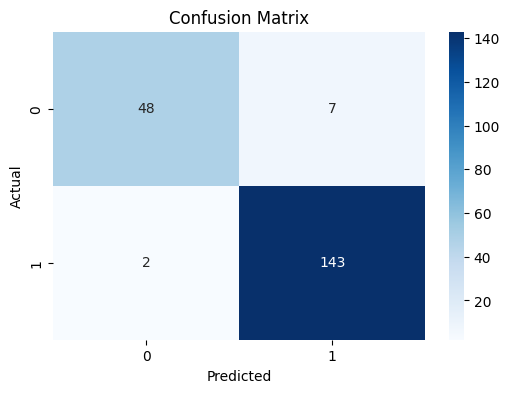


TN = 48
FP = 7
FN = 2
TP = 143


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nTN =", cm[0][0])
print("FP =", cm[0][1])
print("FN =", cm[1][0])
print("TP =", cm[1][1])


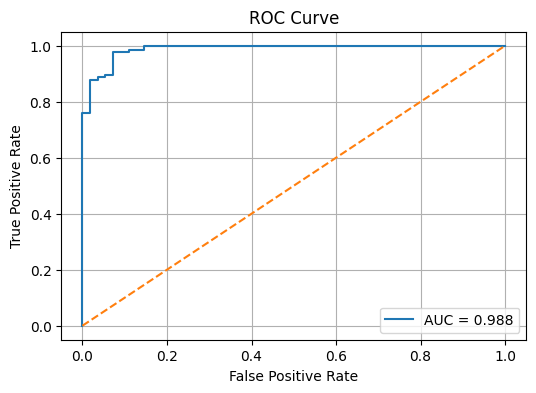

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {round(auc,3)}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
imp = pd.DataFrame({
    "feature": features,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

fig = px.bar(
    imp,
    x="feature",
    y="importance",
    title="Feature Importance (Green Bar Chart)",
    color_discrete_sequence=["#15803d"]  # bright green
)

fig.update_traces(marker_color="#15803d")  # green
fig.show()

imp



,feature,importance
1,mid_sum,0.306861
0,attendance_percent,0.260588
2,final,0.207209
3,cumulative_gpa,0.137076
4,backlogs,0.046727
5,extracurricular_score,0.024771
6,semester,0.016768


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("📌 Cross Validation Scores:", cv_scores)
print("🎯 Mean CV Accuracy:", round(cv_scores.mean()*100,2), "%")


📌 Cross Validation Scores: [0.975   0.95625 0.9625  0.95625 0.95   ]
🎯 Mean CV Accuracy: 96.0 %


In [ ]:
df_test = X_test.copy()
df_test["actual"] = y_test.values
df_test["pred"] = y_pred

errors = df_test[df_test["actual"] != df_test["pred"]]
print("❌ Wrong Predictions:", errors.shape[0])
errors.head()


❌ Wrong Predictions: 9


,attendance_percent,mid_sum,final,cumulative_gpa,backlogs,extracurricular_score,semester,actual,pred
764,36.0,36,60,7.51,1,10,5,0,1
627,40.0,37,75,7.86,2,2,6,1,0
186,37.0,37,50,7.53,0,7,8,0,1
740,42.0,43,87,8.56,2,5,6,0,1
380,35.0,36,72,8.30,3,1,6,0,1
